In [1]:
from lmgp_pytorch.preprocessing.numericlevels import setlevels
from lmgp_pytorch.preprocessing.Normalize import standard
import torch
from lmgp_pytorch.test_functions.multi_fidelity import wing_h, wing_l1, wing_l2, wing_l3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = torch.tensor([[0.5, 0.75, 0.1, 1.0, 0.5, 0.75, 0.125, 0.1, 1.0, 0.1, 0.5], [0.75, 0.1, 0.5, 0.5, 0.5, 0.75, 0.125, 0.1, 1.0, 0.1, 0.5]])
X = torch.randn([11, 4]) * 6 + 2
X = torch.concat([X, a.T], axis = 1)

In [3]:
X2 = setlevels(X, [4,5])


In [4]:
type(X2)

torch.Tensor

In [5]:
X

tensor([[-9.7993e+00,  1.6159e+00, -1.9750e+00,  2.1160e+00,  3.0000e+00,
          4.0000e+00],
        [ 8.4260e+00, -9.1103e+00, -1.0889e+01,  1.4140e+01,  4.0000e+00,
          0.0000e+00],
        [ 9.2713e-01,  2.3145e+00, -7.0050e+00,  1.2713e+01,  0.0000e+00,
          3.0000e+00],
        [ 3.7288e+00,  8.5472e+00,  4.1291e+00,  2.2620e+00,  2.0000e+00,
          3.0000e+00],
        [-3.2906e+00, -5.6772e+00, -2.9074e+00,  4.6082e-03,  3.0000e+00,
          3.0000e+00],
        [ 2.9181e+00,  4.7279e-01,  5.6160e+00,  6.3664e+00,  4.0000e+00,
          4.0000e+00],
        [-4.7440e+00,  6.9721e-01,  5.0393e+00,  1.3606e+00,  1.0000e+00,
          1.0000e+00],
        [-6.2517e+00,  2.3178e+00, -6.0881e+00,  1.3203e+01,  0.0000e+00,
          0.0000e+00],
        [-2.6780e+00, -7.0147e-01,  1.7247e+01,  1.0198e+01,  2.0000e+00,
          2.0000e+00],
        [-4.2731e-01,  1.1705e+01, -2.8031e-02, -5.0908e+00,  0.0000e+00,
          0.0000e+00],
        [-8.7615e+00,  4.4472e

In [6]:
n = 10000
Xh, yh= wing_h(n = n)
Xl1, yl1= wing_l1(n = n)
Xl2, yl2= wing_l2(n = n)
Xl3, yl3= wing_l3(n = n)


In [7]:
Xh[0,:]

array([1.66922910e+02, 2.25865542e+02, 7.37777779e+00, 9.49514080e-01,
       3.17130181e+01, 8.80007855e-01, 1.67330805e-01, 3.95577321e+00,
       2.31263306e+03, 7.09430585e-02])

In [8]:
wing_h(Xh[0,:].reshape(1,-1))

array([236.12012484])

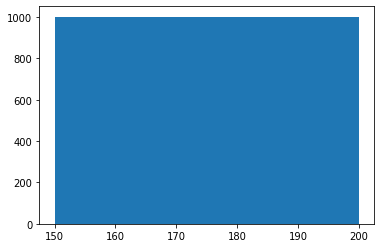

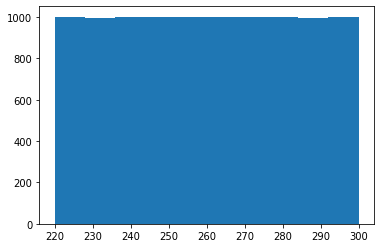

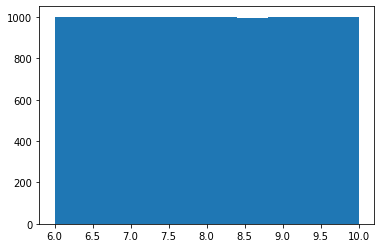

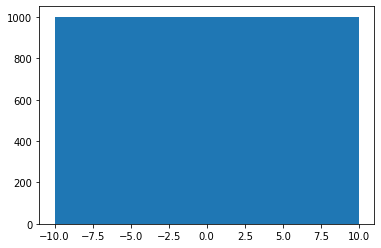

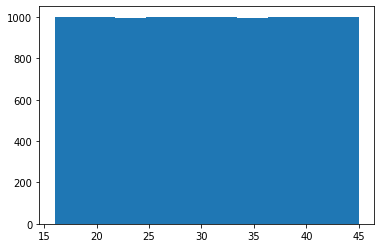

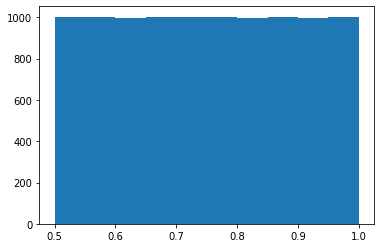

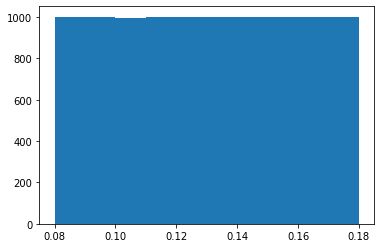

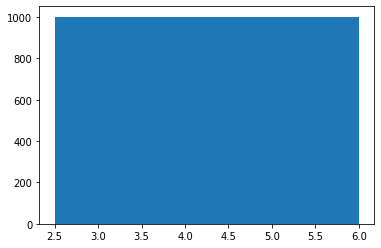

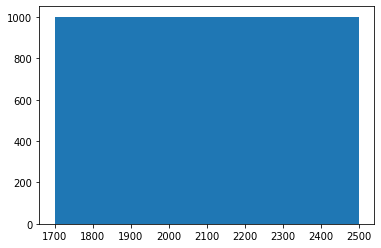

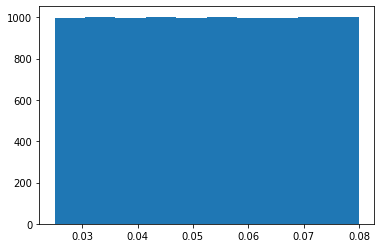

In [9]:
for i in range(Xh.shape[-1]):
    plt.hist(Xh[:,i])
    plt.show()

In [10]:
Xh[2,:]

array([1.95152861e+02, 2.54386535e+02, 6.60151380e+00, 6.59779787e+00,
       2.11962277e+01, 6.87735826e-01, 1.46012698e-01, 4.85861769e+00,
       2.00680189e+03, 3.37598453e-02])

In [11]:
wing_h(Xh[2,:].reshape(1,-1))

array([258.91604373])

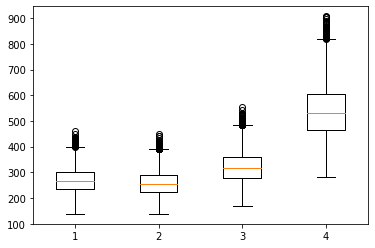

In [12]:
bx = plt.boxplot([yh, yl1, yl2, yl3])

In [13]:
np.min(yh)

138.50578325164972

In [14]:
min_value = 1000
for i in range(50):
    Xh, yh = wing_h(n = 1000000)
    min_value = np.min([np.min(yh), min_value])
    print(f'the minimum is {np.min(yh)} at {np.argmin(yh)}')
print(f'min_value is {min_value}')

the minimum is 132.96030810873316 at 835578
the minimum is 135.97418999665234 at 843053
the minimum is 133.13899188265117 at 643835
the minimum is 134.94517599906573 at 505025
the minimum is 135.7343785899788 at 965052
the minimum is 133.16712595386844 at 132747
the minimum is 136.55278099014225 at 332510
the minimum is 135.87955305440565 at 508002
the minimum is 135.89955980631626 at 890983
the minimum is 134.9084533185428 at 975160
the minimum is 133.67380792386558 at 244715
the minimum is 135.31586580711678 at 349095
the minimum is 135.4414115004729 at 946949
the minimum is 136.99952033916162 at 575011
the minimum is 137.78362807597725 at 628030
the minimum is 134.71404001583423 at 21219
the minimum is 136.38052516033554 at 65584
the minimum is 133.9672777178731 at 781837
the minimum is 133.9361182696699 at 833820
the minimum is 129.86437623099016 at 338622
the minimum is 133.2023021952877 at 141557
the minimum is 134.17040999845972 at 253438
the minimum is 134.50018446613043 at 907

In [16]:
from scipy.optimize import minimize, Bounds

In [17]:
Xh, yh = wing_h(n = 1000000)
Xh.shape

(1000000, 10)

In [18]:
l_bound = [150, 220, 6, -10, 16, 0.5, 0.08, 2.5, 1700, 0.025]
u_bound = [200, 300, 10, 10, 45, 1, 0.18, 6, 2500, 0.08]

In [20]:
bnds = Bounds(l_bound, u_bound)

In [21]:
out = minimize(lambda x: wing_h(x), Xh[86,:].reshape(1,-1), method='Nelder-Mead', tol=1e-6, bounds= bnds)
print(f'the minimum is {out.fun} at {out.x}')

the minimum is 123.25369622309495 at [ 1.50000000e+02  2.20001760e+02  6.00000033e+00 -1.69800370e-02
  1.60000000e+01  5.00001129e-01  1.80000000e-01  2.50000000e+00
  1.70000000e+03  2.50000116e-02]


In [22]:
out = minimize(lambda x: wing_h(x), Xh[86,:].reshape(1,-1), method='L-BFGS-B', tol=1e-6, bounds= bnds)
print(f'the minimum is {out.fun} at {out.x}')

the minimum is 123.2536717013666 at [1.50000000e+02 2.20000000e+02 6.00000000e+00 1.65513324e-04
 1.60000000e+01 5.00000000e-01 1.80000000e-01 2.50000000e+00
 1.70000000e+03 2.50000000e-02]


In [23]:
out = minimize(lambda x: wing_h(x), Xh[86,:].reshape(1,-1), method='SLSQP', tol=1e-6, bounds= bnds)
print(f'the minimum is {out.fun} at {out.x}')

the minimum is 123.27275236077037 at [ 1.50000000e+02  2.30260488e+02  6.00000014e+00 -4.86412938e-03
  1.60000000e+01  5.00000001e-01  1.80000000e-01  2.50000008e+00
  1.70000025e+03  2.50000058e-02]


In [24]:
out = minimize(lambda x: wing_h(x), Xh[86,:].reshape(1,-1), method='Powell', tol=1e-6, bounds= bnds)
print(f'the minimum is {out.fun} at {out.x}')

the minimum is 123.25391170528891 at [1.50000001e+02 2.20000001e+02 6.00000248e+00 3.29270925e-07
 1.60000005e+01 5.00000370e-01 1.79999404e-01 2.50000038e+00
 1.70000000e+03 2.50005250e-02]


In [25]:
for i in range(10):
    out = minimize(lambda x: wing_h(x), Xh[np.random.randint(0,1000),:].reshape(1,-1), method='L-BFGS-B', tol=1e-6, bounds= bnds)
    print(f'the minimum is {out.fun} at {out.x}')


the minimum is 123.25367170093895 at [ 1.50000000e+02  2.20000000e+02  6.00000000e+00 -3.58925194e-05
  1.60000000e+01  5.00000000e-01  1.80000000e-01  2.50000000e+00
  1.70000000e+03  2.50000000e-02]
the minimum is 123.25367170092001 at [1.50000000e+02 2.20000000e+02 6.00000000e+00 1.14577358e-05
 1.60000000e+01 5.00000000e-01 1.80000000e-01 2.50000000e+00
 1.70000000e+03 2.50000000e-02]
the minimum is 123.25368328006307 at [ 1.50000000e+02  2.20000000e+02  6.00000000e+00 -2.65866723e-02
  1.60000000e+01  5.00000000e-01  1.80000000e-01  2.50000000e+00
  1.70000000e+03  2.50000000e-02]
the minimum is 123.25367170106647 at [ 1.50000000e+02  2.20000000e+02  6.00000000e+00 -9.52443279e-05
  1.60000000e+01  5.00000000e-01  1.80000000e-01  2.50000000e+00
  1.70000000e+03  2.50000000e-02]
the minimum is 123.25367170095032 at [ 1.50000000e+02  2.20000000e+02  6.00000000e+00 -4.45002475e-05
  1.60000000e+01  5.00000000e-01  1.80000000e-01  2.50000000e+00
  1.70000000e+03  2.50000000e-02]
the m